# Understanding your Data
First we need to load our data and perform some basic analysis to understand it. This is called Exploratory Data Analysis in short EDA. We need pandas library for loading our data.

## Importing necessary libraries and moduls

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
# Seaborn settings
#sns.set(style='whitegrid', rc={"grid.linewidth": 0.1}) # plt.style.use('bmh')
sns.set_context("paper", font_scale=2)  #rc={"font.size":52,"axes.titlesize":15,"axes.labelsize":22}font_scale=2,
#plt.figure(figsize=(3.1, 3)) # Two column paper. Each column is about 3.15 inch wide.
color = sns.color_palette("Set2", 6) 
# Available seaborn palette names: deep, muted, bright, pastel, dark, colorblind
# Other options: name of matplotlib cmap, 'hls', 'husl', or a list of colors in any format matplotlib accepts
%matplotlib inline

In [3]:
train_df = pd.read_csv("DataSets/train.csv")
test_df = pd.read_csv("DataSets/test.csv")

In [4]:
row1 = "p"
row2 = "y"
row3 = "t"
row4 = "h"
row5 = "o"
row6 = "n"

In [5]:
 rows= ["p", "y", "t", "h", "o", "n"]

In [6]:
for number in range(1,7):
    print(eval("row"+str(number)))

p
y
t
h
o
n


In [7]:
row1, col1 = train_df.shape
row2, col2 = test_df.shape
total_rows = row3 = row1 + row2 
col3 = col1
for row, data in zip(range(1,4),["train", "test", "total"]):
    print("There are {} rows and {} columns in {} data.".format(eval("row"+str(row)), eval("col"+str(row)), data))

There are 891 rows and 12 columns in train data.
There are 418 rows and 11 columns in test data.
There are 1309 rows and 12 columns in total data.


## Exploratory Data Analysis (EDA)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df.isna().apply(pd.value_counts)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
False,891.0,891.0,891.0,891.0,891.0,714,891.0,891.0,891.0,891.0,204,889
True,NaN,NaN,NaN,NaN,NaN,177,NaN,NaN,NaN,NaN,687,2


In [10]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1. There are too many missing values in Cabin Column. It could be dropped.
2. Age, Fare and Embarked columns have also some missing values. But they could be easily filled.

In [11]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


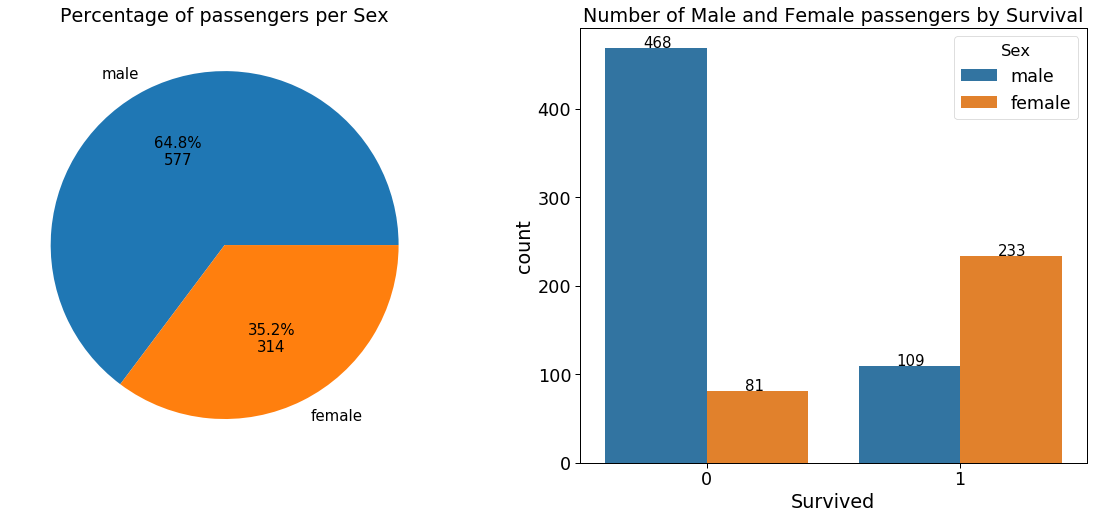

In [13]:
values= list(train_df["Sex"].value_counts())
def pie_values(pct, values):
    value = int(pct/100.*np.sum(values))
    return "{:.1f}%\n{:d}".format(pct, value)

plt.figure(figsize=(20, 8))
plt.subplot(121)
train_df["Sex"].value_counts().plot.pie(autopct=lambda pct: pie_values(pct, values),
                                           title="Percentage of passengers per Sex",
                                           textprops={'fontsize': 15})

plt.ylabel("")
plt.subplot(122)
ax = sns.countplot(x="Survived", hue="Sex", data=train_df)
plt.title("Number of Male and Female passengers by Survival")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+0.7), size=15)

1. 577 passengers (%65) were male and 314 passengers (%35) were female. 
2. According to the training data females are most likely to survive.

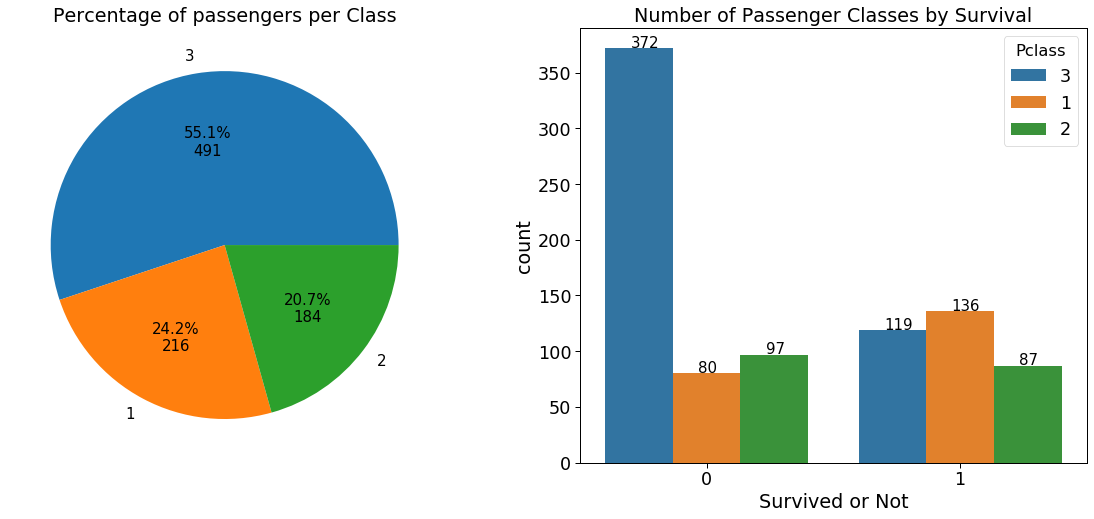

In [14]:
values= list(train_df["Pclass"].value_counts())
def pie_values(pct, values):
    value = int(pct/100.*np.sum(values))
    return "{:.1f}%\n{:d}".format(pct, value)

plt.figure(figsize=(20, 8))
plt.subplot(121)
train_df["Pclass"].value_counts().plot.pie(autopct=lambda pct: pie_values(pct, values),
                                           title="Percentage of passengers per Class",
                                           textprops={'fontsize': 15})
plt.ylabel("")
plt.subplot(122)
ax = sns.countplot(x="Survived", hue="Pclass", data=train_df, hue_order=[3,1,2])
plt.title("Number of Passenger Classes by Survival")
plt.xlabel("Survived or Not")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.10, p.get_height()+0.7), size=15)

1. More than half of the total passengers (491 - %55) are 3rd Class.
2. According to the training data most of the 3rd Class passengers are not survived.

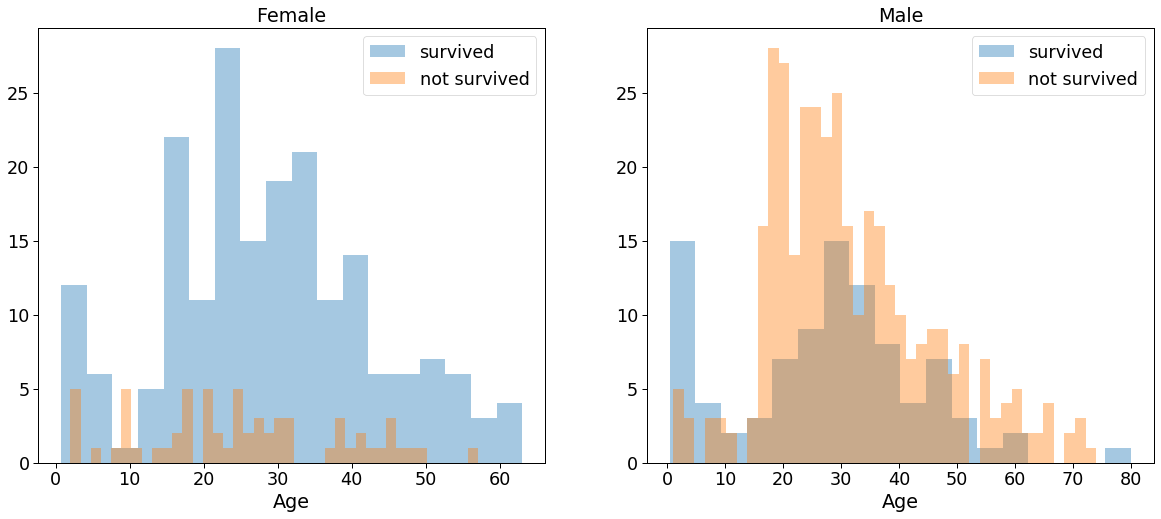

In [15]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 8))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

## Dealing with Missing Values

### Embarked Column

In [16]:
train_df[train_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [17]:
train_df.Cabin

0                  NaN
1                  C85
2                  NaN
3                 C123
4                  NaN
5                  NaN
6                  E46
7                  NaN
8                  NaN
9                  NaN
10                  G6
11                C103
12                 NaN
13                 NaN
14                 NaN
15                 NaN
16                 NaN
17                 NaN
18                 NaN
19                 NaN
20                 NaN
21                 D56
22                 NaN
23                  A6
24                 NaN
25                 NaN
26                 NaN
27         C23 C25 C27
28                 NaN
29                 NaN
30                 NaN
31                 B78
32                 NaN
33                 NaN
34                 NaN
35                 NaN
36                 NaN
37                 NaN
38                 NaN
39                 NaN
40                 NaN
41                 NaN
42                 NaN
43         

In [18]:
embarked_mode = train_df.Embarked.mode()[0]

In [19]:
train_df.Embarked.fillna(embarked_mode, inplace=True)

In [20]:
train_df[train_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [21]:
train_df.iloc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                             38
SibSp                            0
Parch                            0
Ticket                      113572
Fare                            80
Cabin                          B28
Embarked                         S
Name: 61, dtype: object

### Cabin Column

In [22]:
train_df.Cabin.isnull().sum()/len(train_df) * 100

77.10437710437711

In [23]:
train_df.drop(columns="Cabin", inplace=True)

In [24]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [25]:
test_df.drop(columns="Cabin", inplace=True)

In [26]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


### Age Column

In [27]:
round(train_df.Age.mean())

30.0

In [28]:
mean_age = np.ceil(train_df.Age.mean())

In [29]:
train_df.Age.fillna(mean_age, inplace=True)

In [30]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [31]:
test_df.Age.fillna(mean_age, inplace=True)

In [32]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [33]:
test_df.shape

(418, 10)

### Fare Column

In [34]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)

## Feature Engineering

### Name Column

In [35]:
train_df.Name[:3]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
Name: Name, dtype: object

\w = [A-Za-z0-9_]

In [36]:
train_df.Name.str.extract(",\s(\w+)\.", expand=False).value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Mlle', 'Col', 'Major',
       'Ms', 'Lady', 'Jonkheer', 'Capt', 'Sir', 'Mme', 'Don'],
      dtype='object')

In [37]:
titles_found = train_df.Name.str.extract(",\s(\w+)\.", expand=False).value_counts().index.tolist()
titles_found

['Mr',
 'Miss',
 'Mrs',
 'Master',
 'Dr',
 'Rev',
 'Mlle',
 'Col',
 'Major',
 'Ms',
 'Lady',
 'Jonkheer',
 'Capt',
 'Sir',
 'Mme',
 'Don']

In [38]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    #dataset['Title'] = dataset['Title'].fillna(0)
#train_df = train_df.drop(['Name'], axis=1)
#test_df = test_df.drop(['Name'], axis=1)

In [39]:
print(titles)
train_df.Title.value_counts()

{'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}


1    517
2    185
3    126
4     40
5     23
Name: Title, dtype: int64

### Sex Column

In [40]:
for dataset in data:
    dataset.Sex = dataset.Sex.map({"male":0, "female":1})

In [41]:
train_df.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

### Embarked Column

In [44]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

### Dropping unnecessary Columns

In [45]:
for dataset in data:
    dataset.drop(columns = ['Name', 'Ticket'], inplace=True)

In [46]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,3
2,3,1,3,1,26.0,0,0,7.9250,0,2
3,4,1,1,1,35.0,1,0,53.1000,0,3
4,5,0,3,0,35.0,0,0,8.0500,0,1


In [47]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,2,1
1,893,3,1,47.0,1,0,7.0000,0,3
2,894,2,0,62.0,0,0,9.6875,2,1
3,895,3,0,27.0,0,0,8.6625,0,1
4,896,3,1,22.0,1,1,12.2875,0,3


In [48]:
train_df = train_df.drop(['PassengerId'], axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,1,3
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,3
4,0,3,0,35.0,0,0,8.0500,0,1


## Dealing with data types

In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [51]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
 8   Title        418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


# Modeling

### High Correlation Check

In [53]:
corr = train_df.corr()

In [54]:
# Generating a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

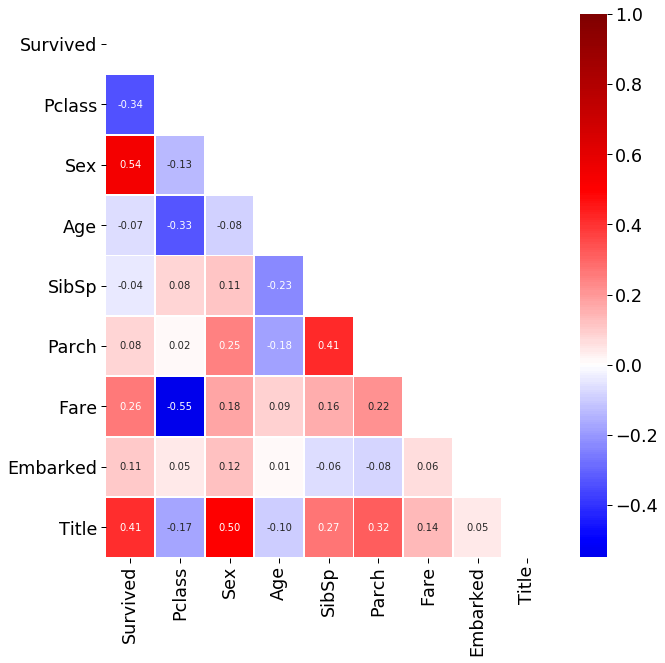

In [55]:
# Adding the mask to the heatmap and see the corr matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask, cmap=cm.seismic, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

## Splitting and Fitting data set

In [56]:
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, random_state=59)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(632, 8) (632,)
(259, 8) (259,)


## Random Forest Classifier

In [59]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
251,3,1,29.0,1,1,10.4625,0,3
736,3,1,48.0,1,3,34.3750,0,3
19,3,1,30.0,0,0,7.2250,1,3
419,3,1,10.0,0,2,24.1500,0,2
456,1,0,65.0,0,0,26.5500,0,1


In [60]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 180, min_samples_leaf=3, max_features=0.5, n_jobs=-1)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

In [61]:
print("Score on train data: ", model.score(X_test, y_test))

accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
print("accuracy: %f" % accuracy)

Score on train data:  0.833976833976834
accuracy: 0.833977


In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.833976833976834

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       149
           1       0.83      0.77      0.80       110

    accuracy                           0.83       259
   macro avg       0.83      0.83      0.83       259
weighted avg       0.83      0.83      0.83       259

[[131  18]
 [ 25  85]]


## Sklearn - Single tree

In [64]:
import random
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
#import xgboost as xgb
#from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
#from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline, make_union

c:\users\buono\01_data_science\99_venv\coursera_env\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


Building a single classifier decision tree with sklearn is easy. You have to provide the list of features that you want the decisions to be made on. Here we give the list of all the features that we have. The multiplication of features comes from the dummy encoding preprocessing that is need for sklearn.

In [65]:
titanic_tree = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state = 1)

In [66]:
titanic_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=1)

In [67]:
print("Score of tree on train data: ", titanic_tree.score(X_test, y_test))

Score of tree on train data:  0.7644787644787645


### Feature importance

In [68]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title'], dtype='object')

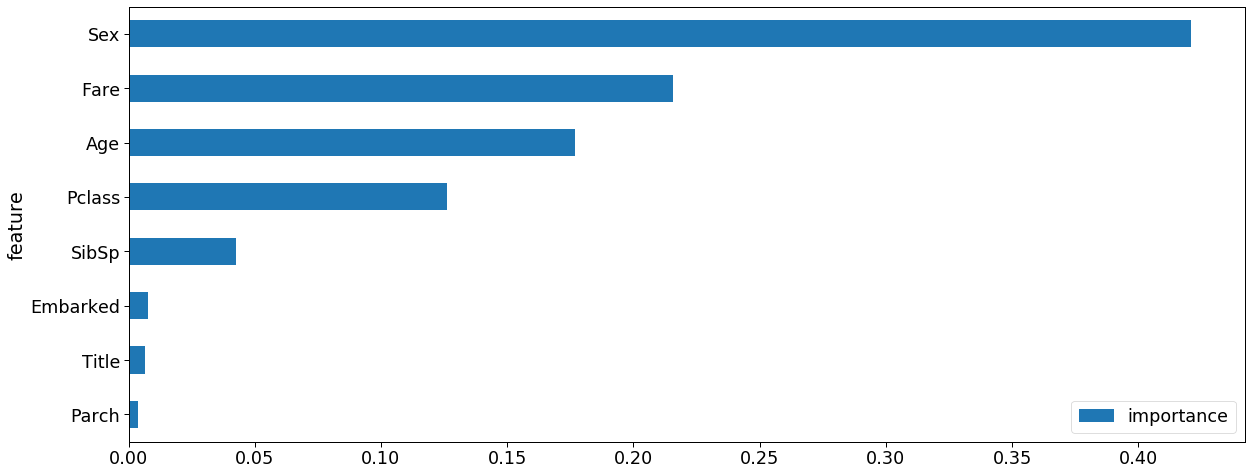

In [69]:
features_imp = pd.DataFrame()
features_imp['feature'] = list(X.columns)
features_imp['importance'] = titanic_tree.feature_importances_
features_imp.sort_values(by=['importance'], ascending=True, inplace=True)
features_imp.set_index('feature', inplace=True)
features_imp.plot(kind='barh', figsize=(20, 8))

## Random Forest

Random forest
Instead of getting a decision from one tree, it is possible to get the answer from a panel of trees, that is to say a forest. Each tree in the forest is different and is built around a sample of features. It is always better to get an answer from a diverse jury and this way overfitting is limited.

In [70]:
# The forest will have 50 trees 
# and the max number of features by trees is the square root of the total features number
my_forest = RandomForestClassifier(n_estimators=50, max_features='sqrt')
my_forest = my_forest.fit(X_train, y_train)

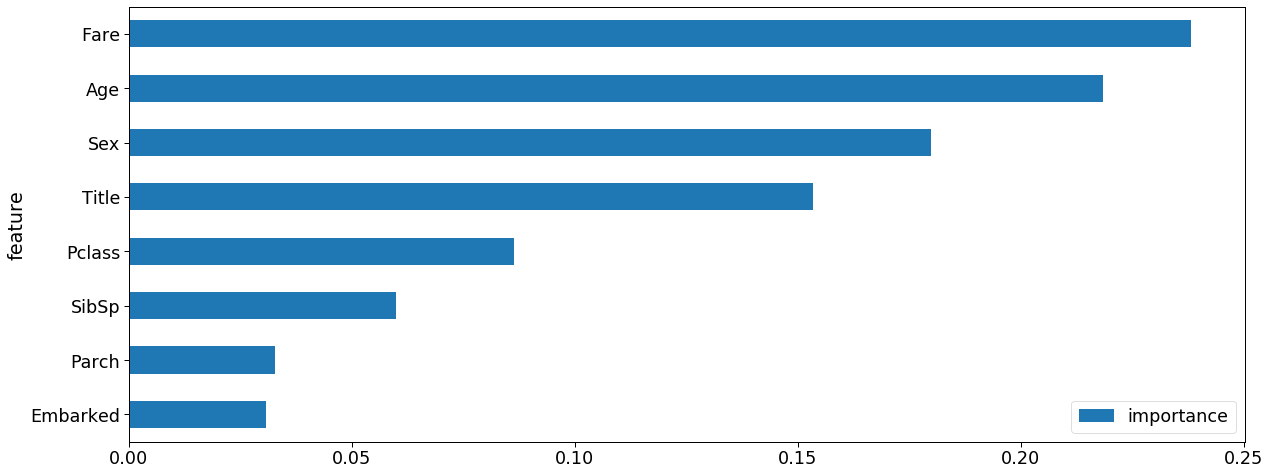

In [71]:
features_imp = pd.DataFrame()
features_imp['feature'] = list(X.columns)
features_imp['importance'] = my_forest.feature_importances_
features_imp.sort_values(by=['importance'], ascending=True, inplace=True)
features_imp.set_index('feature', inplace=True)
features_imp.plot(kind='barh', figsize=(20, 8))

In [72]:
print("Score of forest on train data: ", my_forest.score(X_test, y_test))

#tr_data["eval_forest"] = my_forest.predict(X_test)

#rmse_tree = np.sqrt(mean_squared_error(tr_data["target"], tr_data["eval_forest"]))
#print("RMSE:", rmse_tree)

Score of forest on train data:  0.806949806949807


## Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

#Create classifier object with default hyperparameters
clf = DecisionTreeClassifier()  

#Fit our classifier using the training features and the training target values
clf.fit(X_train, y_train) 

DecisionTreeClassifier()

In [74]:
predictions = clf.predict(X_test)

In [75]:
clf.score(X_test, y_test)

0.7606177606177607

## Submission of the Data

In [76]:
test_df.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,2,1
1,893,3,1,47.0,1,0,7.0000,0,3


In [77]:
passenger_id = test_df.PassengerId
test_df = test_df.drop(['PassengerId'], axis=1)

In [78]:
titanic_preds= model.predict(test_df)

In [79]:
len(titanic_preds)

418

In [80]:
len(passenger_id)

418

In [81]:
titanic_submission_v1= pd.DataFrame({'PassengerId':passenger_id, 'Survived':titanic_preds})

In [82]:
titanic_submission_v1.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [83]:
titanic_submission_v1.to_csv('Group-4.csv', index=False)

In [84]:
df = pd.read_csv('Group-4.csv')
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
